In [1]:
import ast 
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_da = df[df['job_title_short']== 'Data Analyst'].copy()

c:\Users\user\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


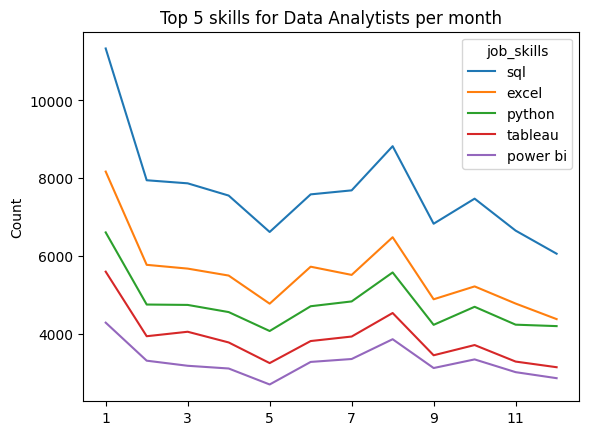

In [2]:

df_job = df[df['job_title_short']== 'Data Analyst'].copy()
df_job['job_posted_month'] = df_job['job_posted_date'].dt.month
df_explode = df_job.explode('job_skills')
df_pivot = df_explode.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size', fill_value=0)
df_pivot.loc['Total'] = df_pivot.sum()
df_pivot = df_pivot[df_pivot.loc['Total'].sort_values(ascending=False).index]
df_pivot = df_pivot.drop('Total')
df_pivot.iloc[:, :5].plot(kind='line')
plt.title('Top 5 skills for Data Analytists per month')
plt.ylabel('Count')
plt.xlabel("")
plt.show()

<Axes: xlabel='job_posted_month'>

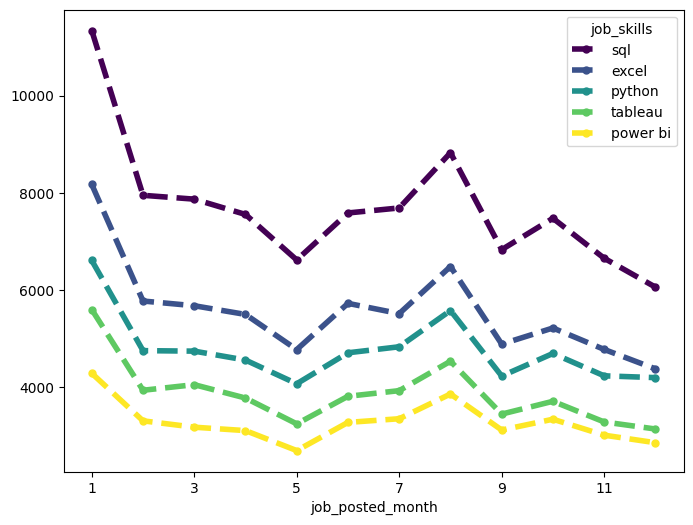

In [3]:
df_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle='--', # options -, --, :, -.
    marker='o',
    colormap='viridis',
    markersize=5,
    figsize=(8, 6)
    )

In [4]:
!pip install adjustText
from adjustText import adjust_text

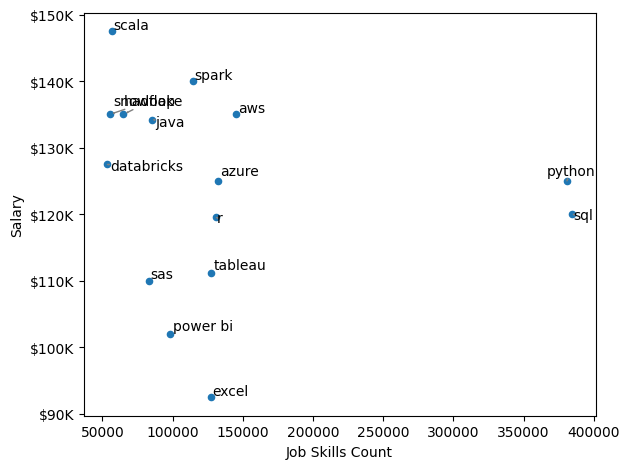

In [5]:
df_exploded = df.explode('job_skills')
asd = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)

asd = asd.sort_values(by='skill_count', ascending=False).head(15)
asd.plot(kind='scatter', x='skill_count', y='median_salary')

texts = []
for i, txt in enumerate(asd.index):
    texts.append(plt.text(asd['skill_count'].iloc[i], asd['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='grey', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.xlabel('Job Skills Count')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()